<a href="https://colab.research.google.com/github/eminenurckr/Veri-Bilimi-Proje--Kalp-/blob/main/Kalp_Yetmezli%C4%9Fi_Veri_K%C3%BCmesi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KALP YETMEZLİĞİ VERİ KÜMESİ

-Kardiyovasküler hastalıklar (KVH), her yıl tahminen 17,9 milyon can alarak, dünya çapındaki tüm ölümlerin %31'ini oluşturan, küresel olarak 1 numaralı ölüm nedenidir. 5CVD ölümlerinden dördü kalp krizi ve felç nedeniyledir ve bu ölümlerin üçte biri 70 yaşın altındaki kişilerde erken meydana gelir. Kalp yetmezliği, CVD'lerin neden olduğu yaygın bir olaydır ve bu veri seti, olası bir kalp hastalığını tahmin etmek için kullanılabilecek 11 özellik içerir.

Kardiyovasküler hastalığı olan veya yüksek kardiyovasküler risk altında olan kişiler (hipertansiyon, diyabet, hiperlipidemi veya önceden belirlenmiş hastalık gibi bir veya daha fazla risk faktörünün varlığı nedeniyle), bir makine öğrenimi modelinin çok yardımcı olabileceği erken tespit ve yönetime ihtiyaç duyar.

Bu veri kümesi, bağımsız olarak mevcut olan ancak daha önce birleştirilmemiş olan farklı veri kümelerinin birleştirilmesiyle oluşturulmuştur. Bu veri setinde, 5 kalp veri seti 11 ortak özellik üzerinden birleştirilmiştir ve bu da onu araştırma amaçları için şimdiye kadar mevcut olan en büyük kalp hastalığı veri seti haline getirmektedir. Küratörlüğü için kullanılan beş veri kümesi şunlardır:

Cleveland: 303 gözlem

Macaristan: 294 gözlem

İsviçre: 123 gözlem

Long Beach VA: 200 gözlem

Stalog (Kalp) Veri Seti: 270 gözlem

# **VERİ ÖN İŞLEME**

In [ ]:
#Veri kümesi kütüphaneleri
import warnings
warnings.filterwarnings('ignore')

import numpy as np  # vektörel ve matris işlemleri
import pandas as pd # dataframe manipülasyon işlemleri
import seaborn as sns #görselleştirme
import matplotlib.pyplot as plt  # görselleştirme
import seaborn as sb  # görselleştirme
%matplotlib inline

In [ ]:
heart_df = pd.read_csv('/content/heart.csv')
heart_df 
#Age:Yaş, Sex:Cinsiyet, ChestPainType:Göğüs ağrısı tipi (ATA: Atipik Angina, TA: Tipik angina, NAP: Anjinal Olmayan Ağrı, ASY: Asemptomatik), 
#Cholesterol: Kolesterol, FastingBS: Açlık kan şekeri, 
#RestingECG: Dinlenme elektrokardiyogram sonuçları (ST: ST-T dalga anormalliği olan, LVH: Sol ventrikül hipertrofisini gösteren), 
#MaxHR:Ulaşılan maksimum kalp hızı, ExerciseAngina: Egzersize bağlı angina, Oldpeak: Eski tepe (Depresyonda ölçülen sayısal değer), 
#ST_Slope: zirve egzersiz ST segmentinin eğimi (UP:eğimli, Flat:Düz, Down:aşağı eğimli), HeartDisease: Kalp hastalığı

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
heart_df.info() #özniteliklerin veri türleri ve içerdikleri kayıt sayısı, bellek kullanımları

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
heart_df.describe().T  #sadece sayısal verilerin temel istatistiki işlemleri

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [ ]:
heart_df.shape

(918, 12)

In [ ]:
heart_df.isna().sum() #veri seti içerisinde boş bir veri var mı

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
heart_df.count()

Age               918
Sex               918
ChestPainType     918
RestingBP         918
Cholesterol       918
FastingBS         918
RestingECG        918
MaxHR             918
ExerciseAngina    918
Oldpeak           918
ST_Slope          918
HeartDisease      918
dtype: int64

In [ ]:
#Kovaryans:İki rastgele değişkenin beraber değişimlerini inceleyen bir istatistiktir
heart_df.cov() 

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,88.974254,44.427519,-98.309701,0.790260,-91.750920,2.601774,1.323300
RestingBP,44.427519,342.773903,204.323837,0.549778,-52.857808,3.254307,0.990808
Cholesterol,-98.309701,204.323837,11964.891079,-12.076452,656.671673,5.850572,-12.663226
FastingBS,0.790260,0.549778,-12.076452,0.178968,-1.415709,0.023778,0.056246
MaxHR,-91.750920,-52.857808,656.671673,-1.415709,648.228614,-4.363589,-5.071057
Oldpeak,2.601774,3.254307,5.850572,0.023778,-4.363589,1.137572,0.214307
HeartDisease,1.323300,0.990808,-12.663226,0.056246,-5.071057,0.214307,0.247420


In [ ]:
#Korelasyon: İki rassal değişken arasındaki doğrusal ilişkinin yönünü ve gücünü belirtir.
heart_df.corr() 

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


# **MODELLEME**

In [ ]:
corr=heart_df.corr() #korelasyon gösterimi

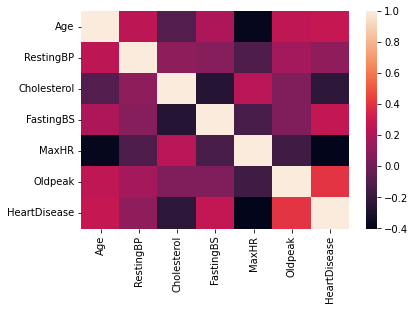

In [ ]:
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)

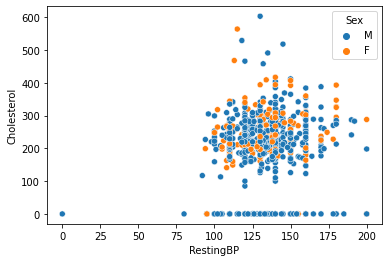

In [ ]:
sns.scatterplot(x='RestingBP',y='Cholesterol', hue='Sex', data=heart_df) #Kolestrol, Dinlenme kan basıncı ve Cinsiyet arasındaki ilişki 

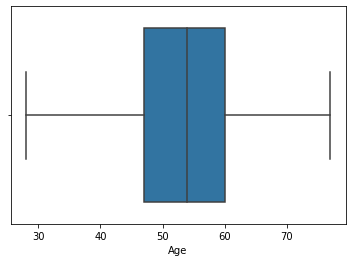

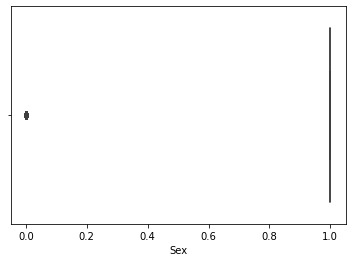

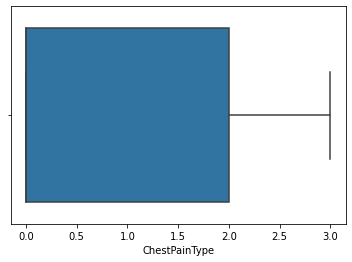

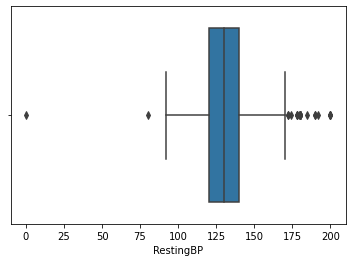

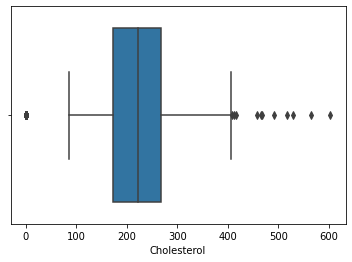

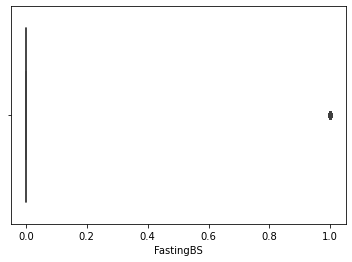

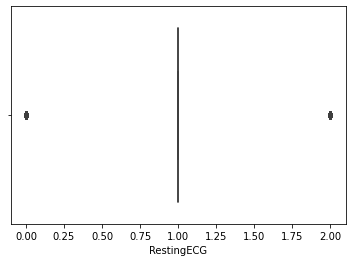

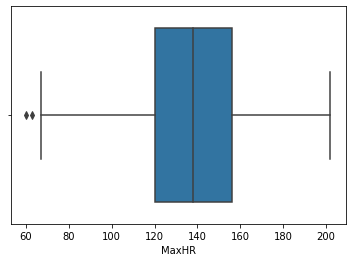

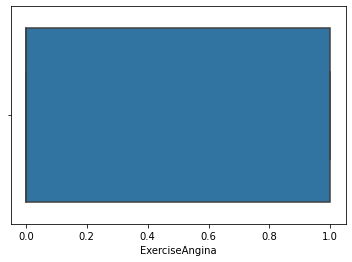

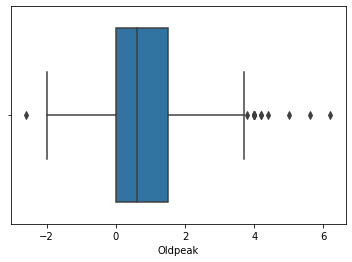

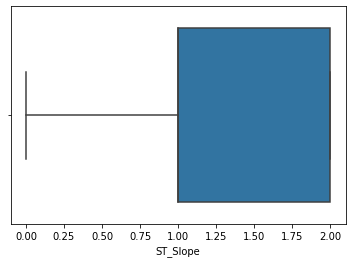

In [ ]:
#Aykırı değerleri kontrol etme

for col in heart_df.columns[:-1]:
    sb.boxplot(heart_df[col]);
    plt.show()

Yukarıdaki grafiklere bakıldığında, RestingBP, Cholesterol, MaxHR ve Oldpeak niteliklerinin aykırı değerler içerdiği açıktır.

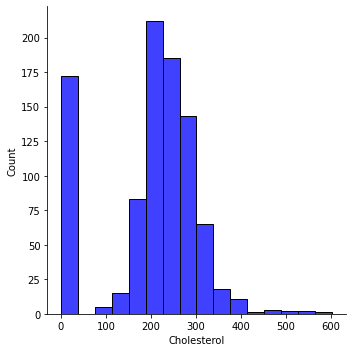

In [ ]:
sns.displot(heart_df['Cholesterol'], bins=16, color="blue") #Kolestrol değerleri dağılımı

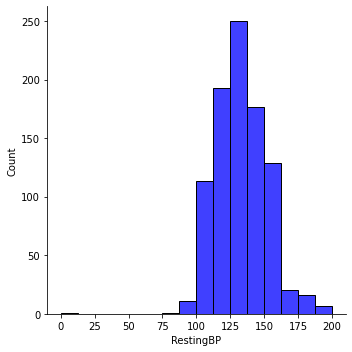

In [ ]:
sns.displot(heart_df['RestingBP'], bins=16, color="blue") #dinlenme kan basıncı değerleri dağılımı

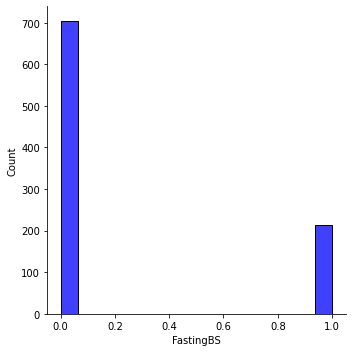

In [ ]:
sns.displot(heart_df['FastingBS'], bins=16, color="blue") #Açlık kan şekeri değerleri dağılımı

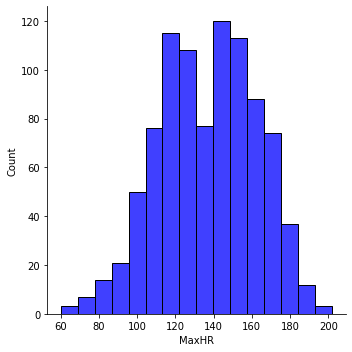

In [ ]:
sns.displot(heart_df['MaxHR'], bins=16, color="blue") #Max kalp atış değerleri dağılımı

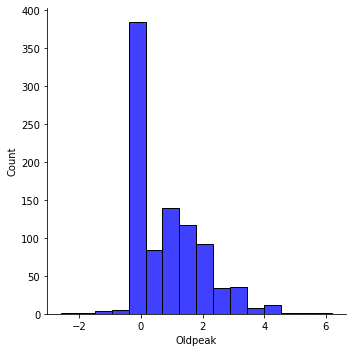

In [ ]:
sns.displot(heart_df['Oldpeak'], bins=16, color="blue") #depresyonda ölçülen sayısal değerlerin dağılımı

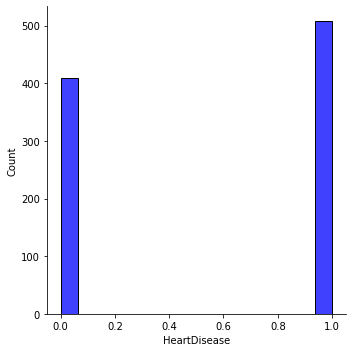

In [ ]:
sns.displot(heart_df['HeartDisease'], bins=16, color="blue") #kalp hastalıkları değerleri dağılımı

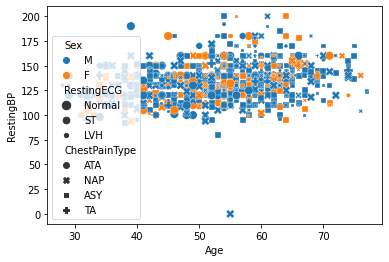

In [ ]:
sns.scatterplot(x='Age',y='RestingBP', hue='Sex', size='RestingECG', style='ChestPainType', data=heart_df) #Yaş, Cinsiyet, Kan şekeri, Tansiyon, Acı eşiği arasındaki ilişki

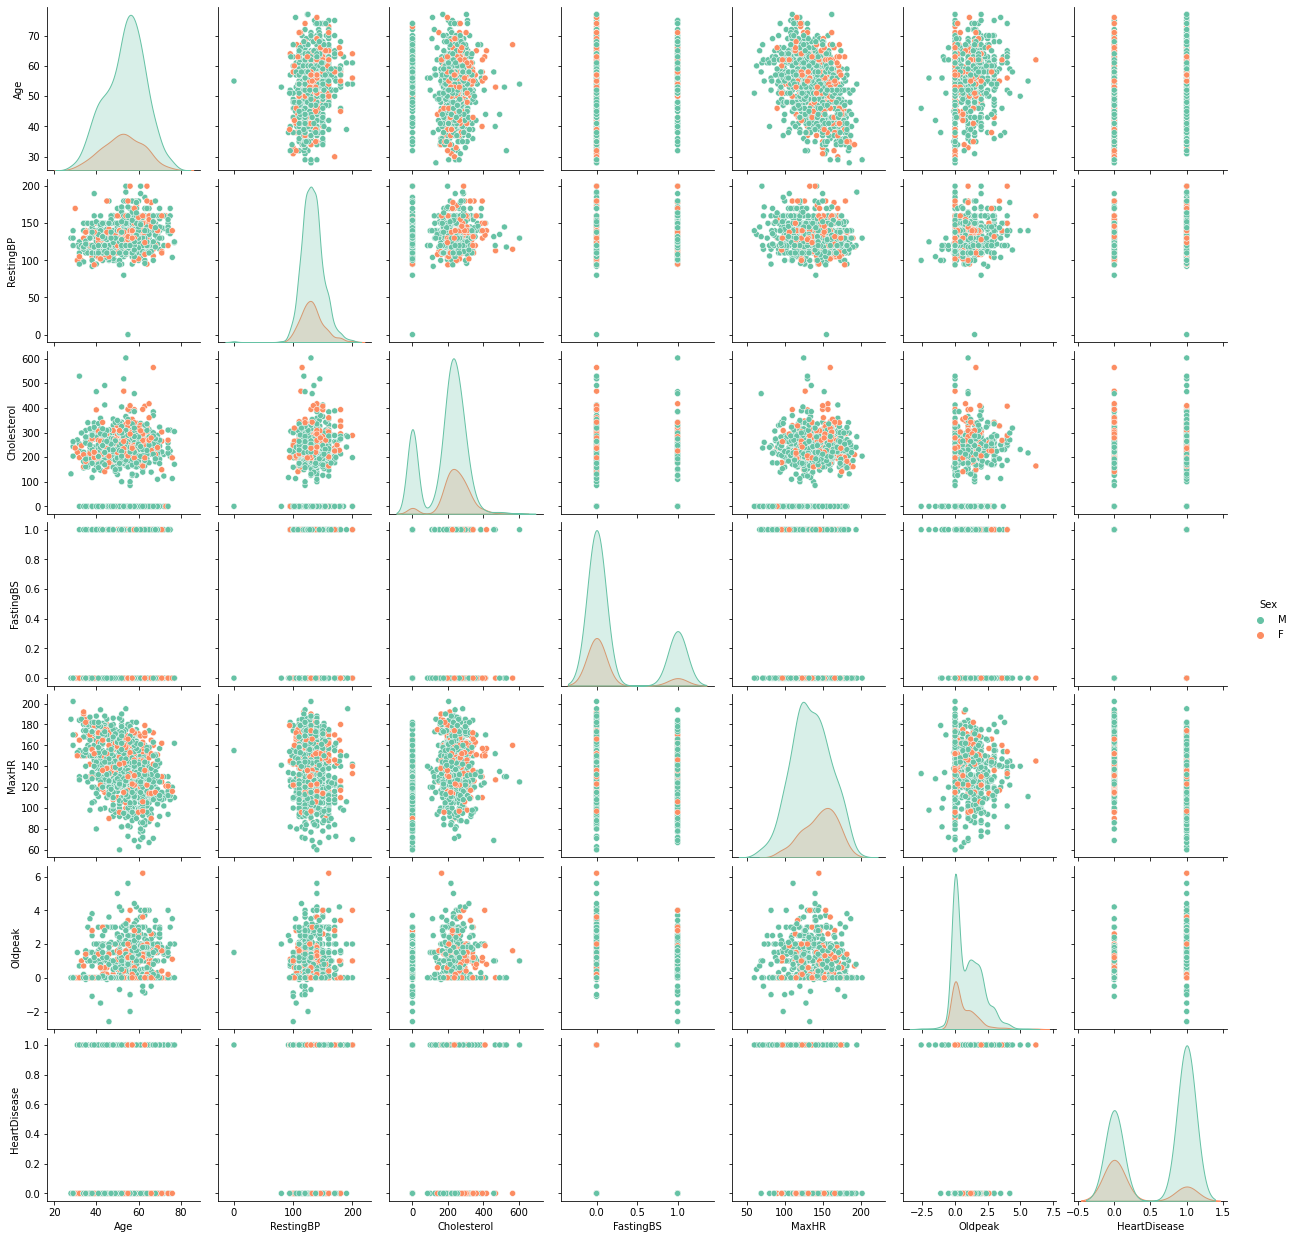

In [ ]:
sns.pairplot(heart_df, hue='Sex', palette='Set2') #verilerin cinsiyet üzerindeki dağılımları

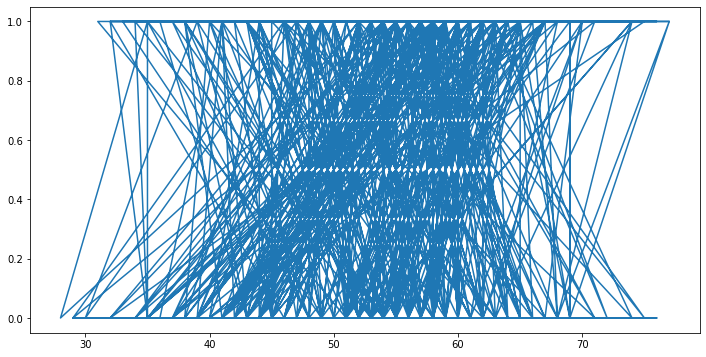

In [ ]:
plt.figure(figsize=(12,6)) # Yaş ve kalp rahatsızlığı figure boyutlama
plt.plot(heart_df.Age, heart_df.HeartDisease)

# **MAKİNE ÖĞRENMESİ**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
os.chdir('/usr/bin/')
dataset = pd.read_csv('/content/heart.csv')

In [ ]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder() #String verileri Floata dönüştürmek için eklenen kütüphane

In [ ]:
heart_df.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1


In [ ]:
cat = ['Sex','ChestPainType','ExerciseAngina','ST_Slope','RestingECG']

In [ ]:
for i in cat:
    heart_df[i] = encode.fit_transform(heart_df[i])

In [ ]:
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [ ]:
x = heart_df.iloc[:,:-1]
x

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1
914,68,1,0,144,193,1,1,141,0,3.4,1
915,57,1,0,130,131,0,1,115,1,1.2,1
916,57,0,1,130,236,0,0,174,0,0.0,1


In [ ]:
y =heart_df.iloc[:,-1]

In [ ]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

Veri seti %80 eğitim ve %20 test olarak bölme işlemi

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42)

In [ ]:
x_train.shape

(688, 11)

In [ ]:
y_train.shape

(688,)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

sc_x_train = scaler.fit_transform(x_train)
sc_x_test = scaler.transform(x_test)

sc_x_train, x_train, sc_x_test

(array([[ 0.23929215,  0.5370191 , -0.80524156, ...,  1.18203745,
          1.90045807, -0.604929  ],
        [ 0.23929215,  0.5370191 ,  1.32146167, ..., -0.84599688,
         -0.83473854, -0.604929  ],
        [ 0.55896789,  0.5370191 ,  1.32146167, ..., -0.84599688,
          0.62403298,  1.08005542],
        ...,
        [ 0.66552646,  0.5370191 , -0.80524156, ...,  1.18203745,
          0.44168654,  1.08005542],
        [ 0.66552646,  0.5370191 , -0.80524156, ...,  1.18203745,
         -0.83473854,  1.08005542],
        [-1.46564508, -1.86213116, -0.80524156, ..., -0.84599688,
          0.98872587, -0.604929  ]]),
      Age  Sex  ChestPainType  ...  ExerciseAngina  Oldpeak  ST_Slope
 155   56    1              0  ...               1      3.0         1
 362   56    1              2  ...               0      0.0         1
 869   59    1              2  ...               0      1.6         2
 101   51    1              0  ...               0      0.0         2
 199   57    0         

In [ ]:
train_test_split(y, shuffle=False)

[0      0
 1      1
 2      0
 3      1
 4      0
       ..
 683    0
 684    1
 685    1
 686    0
 687    0
 Name: HeartDisease, Length: 688, dtype: int64, 688    0
 689    0
 690    1
 691    0
 692    0
       ..
 913    1
 914    1
 915    1
 916    1
 917    0
 Name: HeartDisease, Length: 230, dtype: int64]

#SVM (Support Vector Machine)

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [ ]:
y_pred = svc.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[70, 28],
       [38, 94]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7130434782608696